In [19]:
# Se importan las librerías:
import pandas as pd # manejo y análisis de estructuras de datos - acceso a los datos como indices, nombres, filas y columnas
import numpy as np # cálculo numérico y analisi de datos - procesamiento eficiente de arrays
import seaborn as sns
import matplotlib.pyplot as plt # creación de gráficos de dos dimensiones
%matplotlib inline
font = {'size': 12}
plt.rc('font', **font)

In [20]:
# Se carga el dataSet en un dataFrame
df = pd.read_csv("./train.csv")

In [21]:
# Mostrar el dataFrame - Las primeras 5 filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.dtypes # Lista cinformación de las columnas y sus tipos de datos

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
df.isna().sum() # valida si los datos son numéricos o no para solucionar posibles problemas a futuro

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
mediaEdades=round(df['Age'].mean()) # Se haya busca la media de las edades
df['Age']=df['Age'].fillna(mediaEdades) #Se asigna la media de las edades para asignarselas a los campos vacíos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df['Cabin']=df['Cabin'].fillna('NE') #Se asigna No Especificado (NE) para los campos vacíos en esta columna
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [26]:
df['Cabin'].value_counts() # Conteo de valores de la columna

NE             687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [27]:
df['Embarked']=df['Embarked'].fillna('NE') #Se asigna No Especificado (NE) para los campos vacíos en esta columna
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
df['Embarked'].value_counts() # Conteo de valores de la columna

S     644
C     168
Q      77
NE      2
Name: Embarked, dtype: int64

In [29]:
df['Survived']=df['Survived'].map({ # Para ver mejor los datos, se cambia los valores 1  por 'si' y 0 por 'no'
0: 'No',
1: 'Si'
})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,Si,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Si,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,Si,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S


In [30]:
df['Embarked']=df['Embarked'].map({ # Para ver mejor los datos, se cambia los valores S, C y Q por el nombre completo de la ciudad de embarque
'S': 'Southampton',
'C': 'Cherbourg',
'Q': 'Queenstown'
})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton
1,2,Si,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Si,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton
3,4,Si,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton


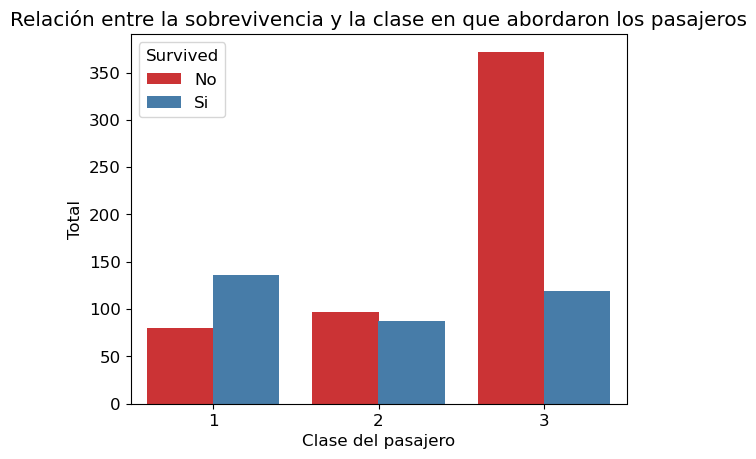

In [31]:
df.groupby(['Pclass', 'Survived'])['Survived'].count() # se agrupa por clase y Sobrevivencia - Columna Pclass y Survived
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = df) # Se especifican parámetros de la gráfica
ax.set(title = 'Relación entre la sobrevivencia y la clase en que abordaron los pasajeros',
xlabel = 'Clase del pasajero', ylabel = 'Total') # Etiquetas de la gráfica
plt.show()  # mostrar la gráfica

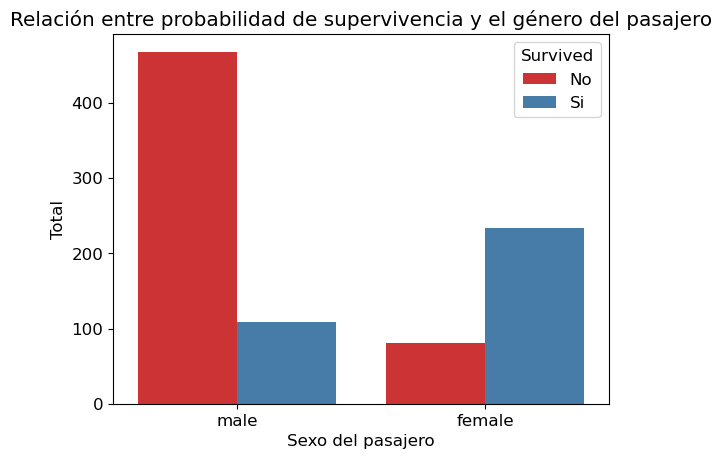

In [32]:
df.groupby(['Sex', 'Survived'])['Survived'].count() # Se agrupa por sexo y sobrevivencia 

ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set1', data = df) # Se especifican parámetros de la gráfica - Columna Sex y Survived
ax.set(title = 'Relación entre probabilidad de supervivencia y el género del pasajero',
xlabel = 'Sexo del pasajero', ylabel = 'Total') # Etiquetas de la gráfica
plt.show()  # mostrar la gráfica